In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.shape

(8693, 14)

In [5]:
test.shape

(4277, 13)

In [6]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [7]:
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [8]:
train['data']='train'
test['data']='test'

In [9]:
all_data = pd.concat([train,test],axis=0)

In [10]:
all_data.shape

(12970, 15)

In [11]:
all_data.tail(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,test
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN,test


## Pre-processing and EDA

## 1. Missing Values handling

In [12]:
all_data.isnull().sum()/len(all_data)*100
# All are below threshold value 
# So imputation is required

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Name             2.266769
Transported     32.976099
data             0.000000
dtype: float64

In [13]:
# name we can drop
all_data = all_data.drop(columns=['Name'])

## Lets first handle Categorical variables missing values

## Cabin variable contains 3 characters . 1- deck 2.number 3.Side (p-port side s-starboard)

In [14]:
## Note: Cabin is indeed a categorical variable but it contains three different type of information. 
## its better split it then imputation should be done

In [15]:
all_data['deck']=all_data['Cabin'].str[0]

In [16]:
all_data['number']= all_data['Cabin'].str.extract('(\d+)')
all_data['side']= all_data['Cabin'].str[-1]

In [17]:
all_data.drop(columns=['Cabin'],inplace=True)

In [18]:
all_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,deck,number,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,0,S


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   object 
 12  data          12970 non-null  object 
 13  deck          12671 non-null  object 
 14  number        12671 non-null  object 
 15  side          12671 non-null  object 
dtypes: float64(6), object(10)
memory usage: 1.7+ MB


In [20]:
## Note that even though 'number' is a numerical value but in this context 'number' represent room number 
## which is a categorical value

In [21]:
## define a function for calculating mode of that variable which will help in imputation of null values
def imputation(col):
    mode = all_data[col].mode().values[0]
    return mode

In [22]:
for i in list(all_data.select_dtypes(include=('object'))):
    all_data[i].replace(np.nan,imputation(i),inplace=True)

In [23]:
all_data.isnull().sum()
# Categorical null values are handled

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             270
VIP               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
data              0
deck              0
number            0
side              0
dtype: int64

In [24]:
## We will impute the median values in Missing values for numerical variables

In [25]:
def num_imputation(col):
    median = all_data[col].median()
    return median

In [26]:
for i in list(all_data.select_dtypes(include=('float64'))):
    all_data[i].replace(np.nan,num_imputation(i),inplace=True)

In [27]:
all_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
data            0
deck            0
number          0
side            0
dtype: int64

## All missing values are handled 

In [28]:
## for analysis purpose we gonna split passengerid into two. one with groupid,and other is just count_id

In [29]:
new_data = all_data.copy()

In [30]:
# Mixed data handling
new_data['group_id'] = new_data['PassengerId'].apply(lambda x:x.split('_')[0])
new_data['count_id'] = new_data['PassengerId'].apply(lambda x:x.split('_')[-1])

In [31]:
new_data.drop(columns=['PassengerId'],inplace=True)

In [32]:
new_data.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,deck,number,side,group_id,count_id
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,B,0,P,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,F,0,S,0002,01


# 3.Encoding 

In [33]:
new_data.number = pd.to_numeric(new_data.number,errors='coerce',downcast='integer')

In [34]:
new_data.number.describe()

count    12970.000000
mean       591.577332
std        512.953469
min          0.000000
25%        156.000000
50%        409.000000
75%        992.000000
max       1894.000000
Name: number, dtype: float64

In [35]:
new_data.group_id = pd.to_numeric(new_data.group_id,errors = 'coerce',downcast='integer')

In [36]:
new_data.count_id = pd.to_numeric(new_data.count_id,errors = 'coerce',downcast='integer')

In [37]:
new_data.count_id.describe()

count    12970.000000
mean         1.511488
std          1.042500
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: count_id, dtype: float64

In [38]:
new_data.deck.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

## One-hot encoding

In [39]:
encode_data = pd.get_dummies(new_data,columns=['HomePlanet','CryoSleep','Destination','VIP','deck','side'],drop_first=True)

In [40]:
pd.set_option('display.max_columns',100)

In [41]:
encode_data.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,number,group_id,count_id,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,train,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,train,0,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [42]:
encode_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'data', 'number', 'group_id', 'count_id',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_S'],
      dtype='object')

## 4. Outlier detection and handling 

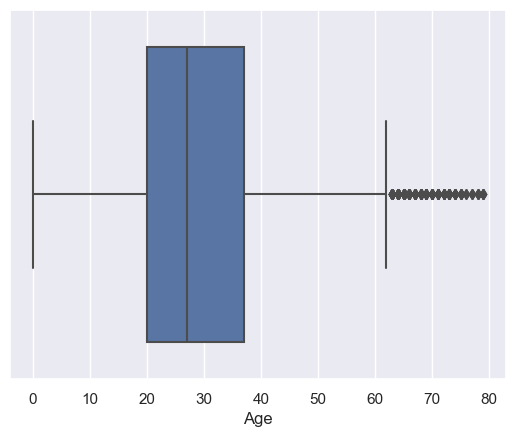

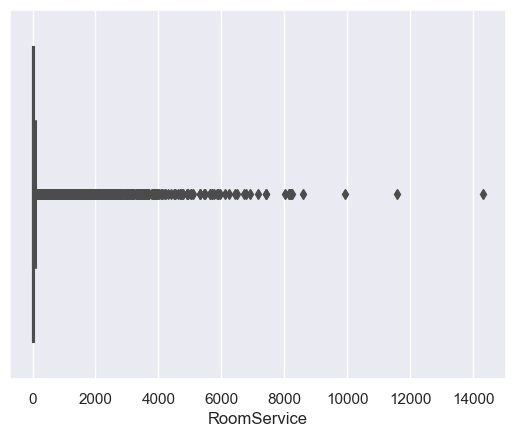

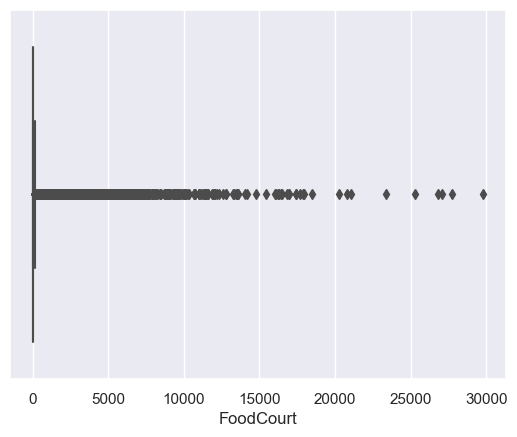

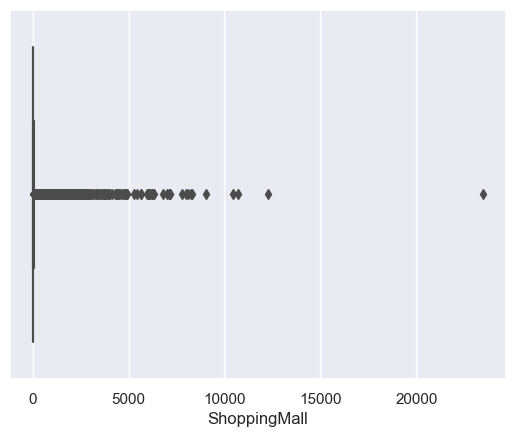

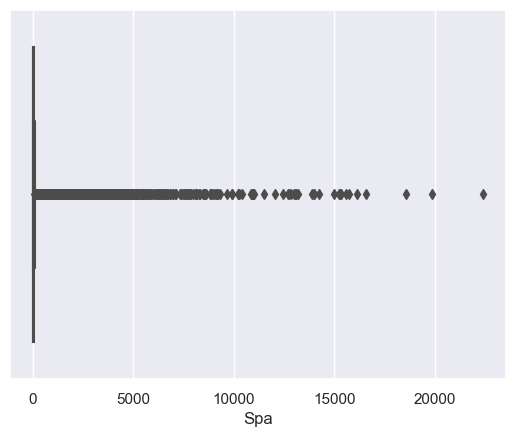

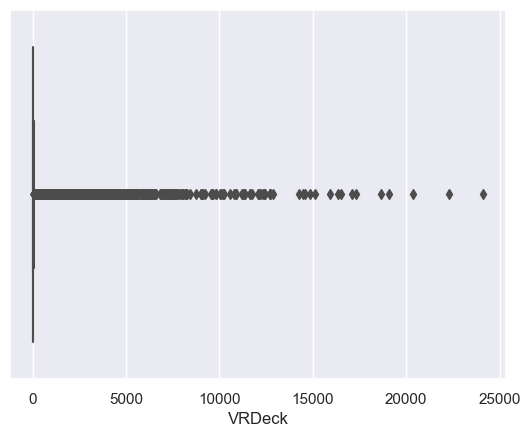

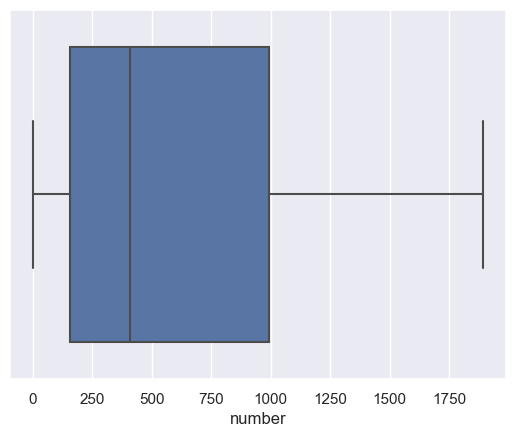

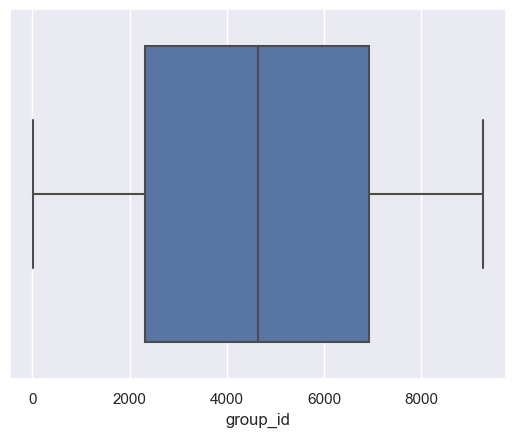

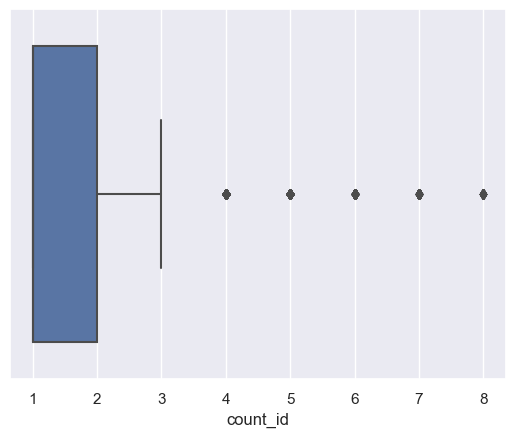

In [43]:
def boxplot(col):
    sns.boxplot(x=new_data[col])
    plt.show()
    
for i in list(new_data.select_dtypes(exclude=(['object','bool']))):
    boxplot(i)

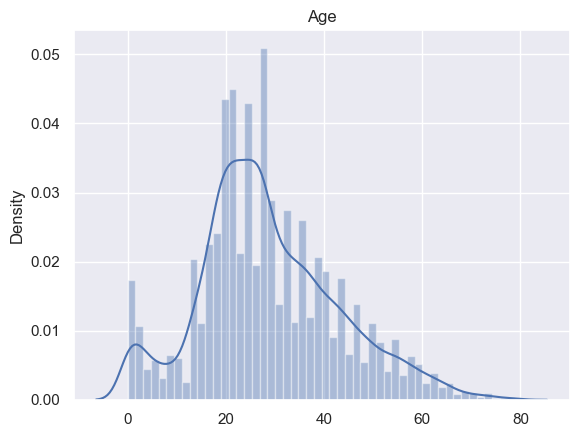

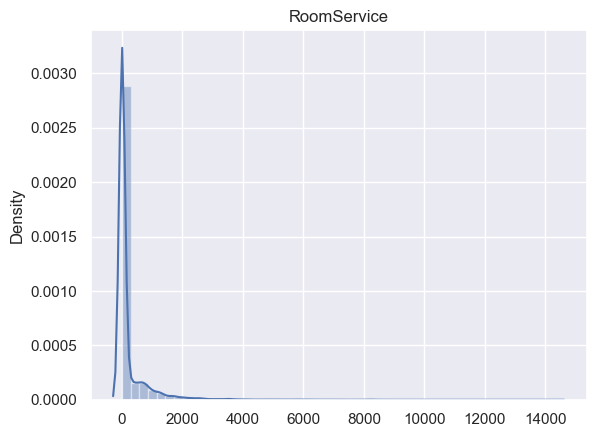

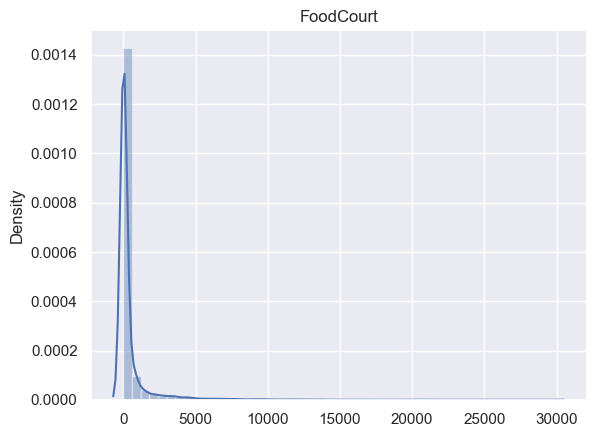

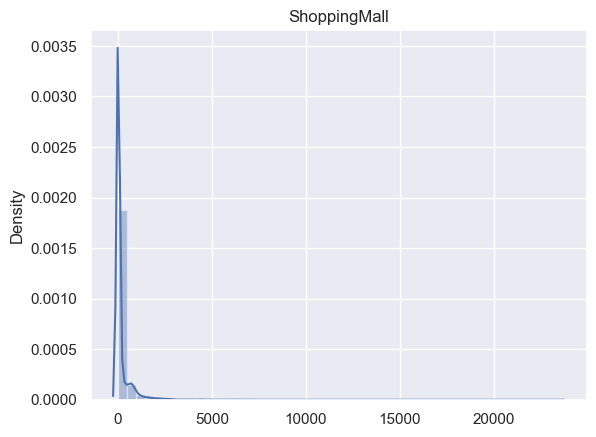

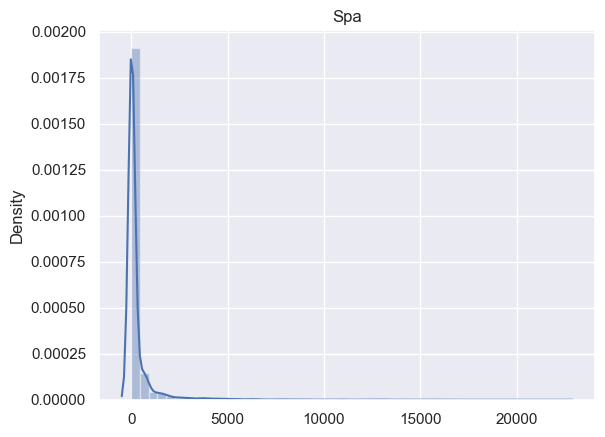

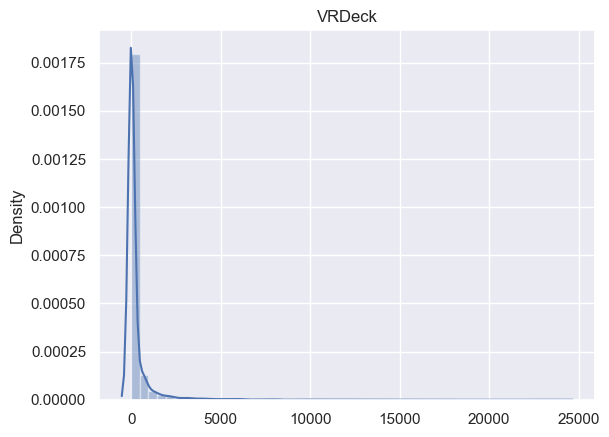

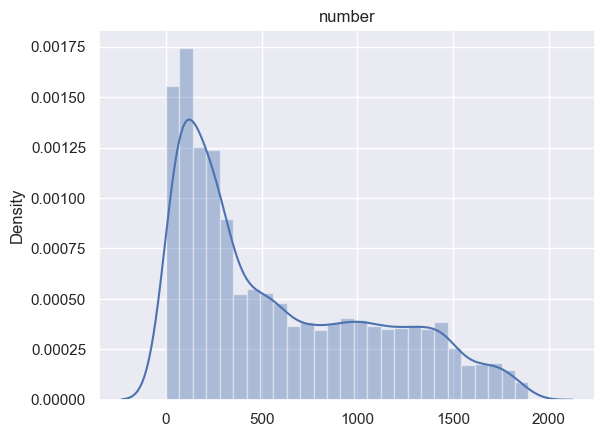

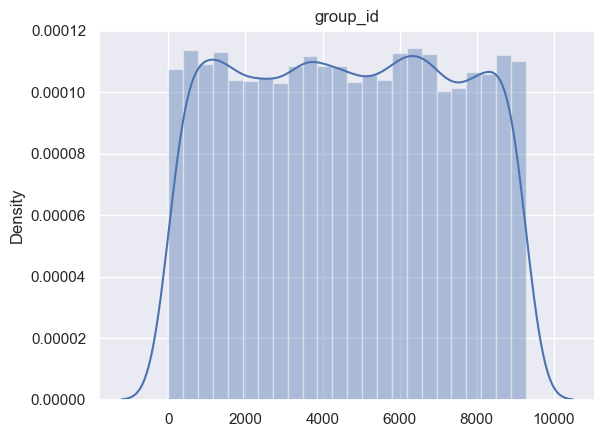

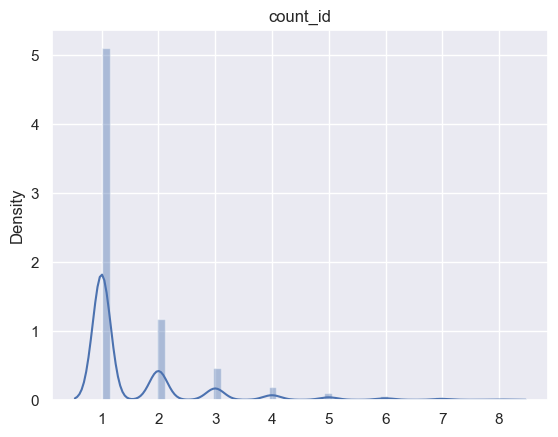

In [44]:
def distplot(col):
    sns.distplot(x=new_data[col])
    plt.title(col)
    plt.show()
    
for i in list(new_data.select_dtypes(exclude=(['object','bool']))):
    distplot(i)

In [45]:
## no outlier handling ecause no abnormal values found since the outlier are in 
## the range like range of age is 80 which is believable

In [46]:
## Split data into test and train
train_data = encode_data[encode_data['data']=='train']
test_data = encode_data[encode_data['data']=='test']

In [47]:
train_data.shape , test_data.shape

((8693, 25), (4277, 25))

In [48]:
train_data.drop(columns=['data'],inplace=True)
test_data.drop(columns=['data'],inplace=True)

In [49]:
train_data.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,number,group_id,count_id,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [50]:
## Split the data into Features and Labels 

In [51]:
x = train_data.drop(columns=['Transported'])
y=train_data['Transported']

In [52]:
x.shape ,y.shape

((8693, 23), (8693,))

In [53]:
## The label is in the form of boolean. converting it into numerical data

In [54]:
 y_dum = pd.get_dummies(y,drop_first=True)

In [55]:
y_dum.head(2)

,True
0,0
1,1


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_dum,test_size=0.2,random_state=100)

## Model Building 

## 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [58]:
len(x_train),len(x_test),len(y_train),len(y_test)

(6954, 1739, 6954, 1739)

In [59]:
logit.fit(x_train,y_train)

LogisticRegression()

In [60]:
logit.score(x_test,y_test)

0.777458309373203

In [61]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report , roc_auc_score

In [63]:
confusion_matrix(y_test,y_pred_test)

array([[593, 292],
       [ 95, 759]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       885
           1       0.72      0.89      0.80       854

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [65]:
print('Train accuracy',round(accuracy_score(y_train,y_pred_train),3))
print('******'*5)      
print('Test accuracy',round(accuracy_score(y_test,y_pred_test),3))

Train accuracy 0.78
******************************
Test accuracy 0.777


In [66]:
roc_auc_score(y_test,y_pred_test)

0.7794076396882732

In [67]:
test_x = test_data.drop(columns=['Transported'])

In [68]:
test_predict = logit.predict(test_x)

In [69]:
test_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [70]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':test_predict})

In [71]:
submission.Transported = np.where(submission.Transported == 1,'True','False')

In [72]:
submission.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False


In [73]:
# submission.to_csv('Spaceship_titanic_logistic_regression.csv',index=False)

## 2. Random Forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='gini')

In [75]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [76]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [77]:
print('Train accuracy',round(accuracy_score(y_train,y_pred_train_rf),3))
print('********'*5)      
print('Test accuracy',round(accuracy_score(y_test,y_pred_test_rf),3))

Train accuracy 1.0
****************************************
Test accuracy 0.793


In [78]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       885
           1       0.80      0.77      0.78       854

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [79]:
x_test_rf = test_data.drop(columns=['Transported'])

In [80]:
y_test_rf = rf.predict(x_test_rf)

In [81]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':y_test_rf})

In [82]:
submission.head(2)

,PassengerId,Transported
0,0013_01,1
1,0018_01,0


In [83]:
# submission.to_csv('Titanic_Random_Forest.csv',index=False)

## 3.Ensemble methods

In [84]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [85]:
ada = AdaBoostClassifier(n_estimators=50,random_state=100)
gbc = GradientBoostingClassifier(random_state=100)

In [86]:
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=100)

In [87]:
y_pred_ada_train = ada.predict(x_train)
y_pred_ada_test = ada.predict(x_test)

In [88]:
print('Train accuracy',round(accuracy_score(y_train,y_pred_ada_train),3))
print('********'*5)      
print('Test accuracy',round(accuracy_score(y_test,y_pred_ada_test),3))

Train accuracy 0.804
****************************************
Test accuracy 0.799


In [89]:
print(classification_report(y_test,y_pred_ada_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       885
           1       0.78      0.83      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [90]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=100)

In [91]:
gbc.score(x_test,y_test)

0.7981598619896493

In [92]:
y_pred_train_gbc = gbc.predict(x_train)
y_pred_test_gbc = gbc.predict(x_test)

In [93]:
 print('Train accuracy',round(accuracy_score(y_train,y_pred_train_gbc),3))
print('********'*5)      
print('Test accuracy',round(accuracy_score(y_test,y_pred_test_gbc),3))

Train accuracy 0.824
****************************************
Test accuracy 0.798


In [94]:
print(classification_report(y_test,y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       885
           1       0.77      0.83      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## 4. XGBoost

In [95]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [96]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
xg.score(x_test,y_test)

0.8073605520414031

## Hyper parametric tuning

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
cv_gbc = cross_val_score(gbc,x,y_dum,cv=10)

In [100]:
cv_gbc.mean()

0.772466304247186

In [101]:
cv_xg = cross_val_score(xg,x,y_dum,cv=10)

In [102]:
cv_xg.mean()

0.6864090049336666

In [103]:
test_data1=test_data.drop(columns=['Transported'])

In [104]:
gbc_answer = gbc.predict(test_data1)

In [105]:
gbc_answer

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [106]:
gbc_answer = np.where(gbc_answer==1,True,False)

In [107]:
answer = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':gbc_answer})

In [108]:
answer.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [109]:
## answer.to_csv('gradientDescentClassifier.csv',index=False)

In [110]:
## Gradient boost Decision Tree

In [111]:
gd = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [112]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(random_state=123)

In [113]:
y_pred_gd = gd.predict(x_test)

In [114]:
print(classification_report(y_test,y_pred_gd))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       885
           1       0.77      0.83      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
#Randomized Search CV

## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [117]:
## create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [118]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [119]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=1000),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [121]:
rf_random.score(x_test,y_test)

-0.19723979298447383

In [122]:
y_predd = rf_random.predict(x_test)

In [123]:
accuracy_score(y_test,y_predd)

0.8027602070155262

In [124]:
y_pred_random = rf_random.predict(test_data1)

In [125]:
y_pred_random

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [126]:
an = np.where(y_pred_random==1,True,False)

In [127]:
ans = pd.DataFrame({'PassengerId':test.PassengerId,'Transported':an})

In [128]:
## ans.to_csv('GradientDescentClassifier_with_tuning.csv',index=False)

## Pycaret experimenting 

In [129]:
import pycaret

In [130]:
from pycaret.classification import *

In [131]:
exp_clf = setup(data = train_data,target='Transported',session_id=123)

,Description,Value
0,Session id,123
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 24)"
4,Transformed data shape,"(8693, 24)"
5,Transformed train set shape,"(6085, 24)"
6,Transformed test set shape,"(2608, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [132]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8005,0.8915,0.8219,0.7909,0.8059,0.6008,0.6015,0.1180
lightgbm,Light Gradient Boosting Machine,0.7980,0.8931,0.7954,0.8022,0.7987,0.5961,0.5962,0.2730
rf,Random Forest Classifier,0.7941,0.8807,0.7582,0.8198,0.7877,0.5884,0.5903,0.2160
xgboost,Extreme Gradient Boosting,0.7929,0.8856,0.7889,0.7981,0.7934,0.5859,0.5861,0.0780
ada,Ada Boost Classifier,0.7926,0.8745,0.8153,0.7828,0.7985,0.5851,0.5859,0.1200
et,Extra Trees Classifier,0.7915,0.8640,0.7475,0.8223,0.7830,0.5832,0.5857,0.2630
lr,Logistic Regression,0.7846,0.8728,0.7928,0.7828,0.7875,0.5690,0.5695,1.1230
ridge,Ridge Classifier,0.7643,0.0000,0.7008,0.8065,0.7497,0.5291,0.5340,0.0520
lda,Linear Discriminant Analysis,0.7643,0.8518,0.7008,0.8065,0.7497,0.5291,0.5340,0.0750
knn,K Neighbors Classifier,0.7569,0.8243,0.7801,0.7483,0.7638,0.5137,0.5143,0.1420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [133]:
train_data.Transported = train_data.Transported.apply(lambda x:1 if x==True else 0)

In [134]:
best = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8046,0.8869,0.8111,0.8032,0.8071,0.6091,0.6092
1,0.7701,0.8710,0.7980,0.7585,0.7778,0.5400,0.5407
2,0.8046,0.8926,0.8274,0.7938,0.8102,0.6090,0.6096
3,0.7882,0.8859,0.8208,0.7730,0.7962,0.5761,0.5772
4,0.8112,0.9008,0.8241,0.8057,0.8148,0.6222,0.6224
5,0.8125,0.8962,0.8170,0.8117,0.8143,0.6250,0.6250
6,0.7944,0.8925,0.8268,0.7785,0.8019,0.5886,0.5898
7,0.8224,0.9072,0.8268,0.8214,0.8241,0.6447,0.6447
8,0.7829,0.8810,0.8301,0.7605,0.7938,0.5655,0.5679


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [135]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…